<center><img src="https://blog.ipleaders.in/wp-content/uploads/2020/04/advertising-agency-e1586694068452.jpg" width="600" height="500"></center>

<center><h1>Advertisement Budget Prediction</h1></center>


<b>Description:</b><br>
<li>The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.</li>

<li>It is required to understand the impact of ad budgets on the overall sales.</li>
<br>

<b>Acknowledgement:</b><br>

<p><i>The dataset is taken from Kaggle</i></p>

<b>Objective:</b><br>

<li>Understand the Dataset & cleanup (if required).</li>
<li>Build Regression models to predict the sales w.r.t a single & multiple features.</li>
<li>Also evaluate the models & compare their respective scores like R2, RMSE, etc.</li>


<center><h1>Stractegic Plan of Action:</h1></center>

<b>This notebook aims to solve the problem statement by creating a plan of action, 
    Here are some of the necessary steps:</b>

1. [Data Exploration](#0)
    * [Importing Library](#1)
    * [Basic Summary Function](#2)
    * [Importing Datasets](#3)
    * [Dataset Features](#4)
    * [Basic Stats](#5)
2. [Exploratory Data Analysis (EDA)](#6)
    * [Target Variable Distribution - Median Value ](#7)
    * [Categorical features in the dataset](#8)
    * [Numeric Features Distribution](#9)
    * [Relationship between all the features](#10)
3. [Data Pre-processing](#11)
    * [Remove Duplicates](#12)
    * [Check Inconsistant Values](#13)
    * [Remove Outliers](#14)
    * [Dataset after Preprocessing](#15)
4. [Data Manipulation](#16)
    * [Spliting Dataset](#17)
    * [Standardization](#18)
5. [Feature Selection/Extraction](#19)
    * [Correlation](#20)
    * [OLS Regression](#21)
        * [Fixing Multicollinearity](#22)
            * [Manual Method - Variance Inflation Factor (VIF)](#22)
            * [Automatic Method - RFE](#23)
            * [Feature Elmination using PCA Decomposition](#24)
6. [Predictive Modelling](#25)
    * [Regression Model Helper Function](#26)
        * [Multiple Linear Regression(MLR)](#27)
        * [Ridge Regression Model](#28)
        * [Lasso Regression Model](#29)
        * [Elastic-Net Regression](#30)
        * [Polynomial Regression Mode](#31)
        * [Evaluation Metics](#32)
        * [Comapring Regression Models](#33)
        * [Root Mean SquaredError Comparison](#34)
7. [Project Outcomes & Conclusion](#35)

<a id="0"></a> <br>
# Data Exploration

**<p id='1'><li>Importing Library</li></p>**

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,6]

import warnings 
warnings.filterwarnings('ignore')

**<p id='2'><li>Basic Summary Function</li></p>**

In [2]:
def basicSummary(dataFrameForSummary):
    print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))
    summary = pd.DataFrame(dataFrameForSummary.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Num of Nulls'] = dataFrameForSummary.isnull().sum().values
    summary['Num of Unique'] = dataFrameForSummary.nunique().values
    summary['First Value'] = dataFrameForSummary.loc[1].values
    summary['Second Value'] = dataFrameForSummary.loc[2].values
    summary['Third Value'] = dataFrameForSummary.loc[3].values
    summary['Fourth Value'] = dataFrameForSummary.loc[4].values
    return summary

**<p id='3'><li>Importing dataset</li></p>**

In [3]:
#Importing the dataset
df = pd.read_csv('/users/kushtrivedi/Downloads/Advertisement/Advertising Budget and Sales.csv', index_col=0, names=['TV','Radio','Newspaper','Sales'], skiprows=1)

#df.drop([''], axis=1, inplace=True)
display(basicSummary(df))

target = 'Sales'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)


Inference: The Datset consists of 4 features & 200 samples.


,Feature,Data Type,Num of Nulls,Num of Unique,First Value,Second Value,Third Value,Fourth Value
0,TV,float64,0,190,230.1,44.5,17.2,151.5
1,Radio,float64,0,167,37.8,39.3,45.9,41.3
2,Newspaper,float64,0,172,69.2,45.1,69.3,58.5
3,Sales,float64,0,121,22.1,10.4,9.3,18.5


**<p id='4'><li>Dataset Features</li></p>**

In [4]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 0 categorical features.


**<p id='5'><li>Basic Stats</li></p>**

In [5]:
display(df.describe())
print("\033[1mInference:\033[0m  The stats seem to be fine, let us do further analysis on the Dataset")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Inference:  The stats seem to be fine, let us do further analysis on the Dataset


<a id="6"></a> <br>
# Exploratory Data Analysis (EDA)

**<p id='7'><li>Target Variable Distribution - Median Value $1Ms</li></p>**

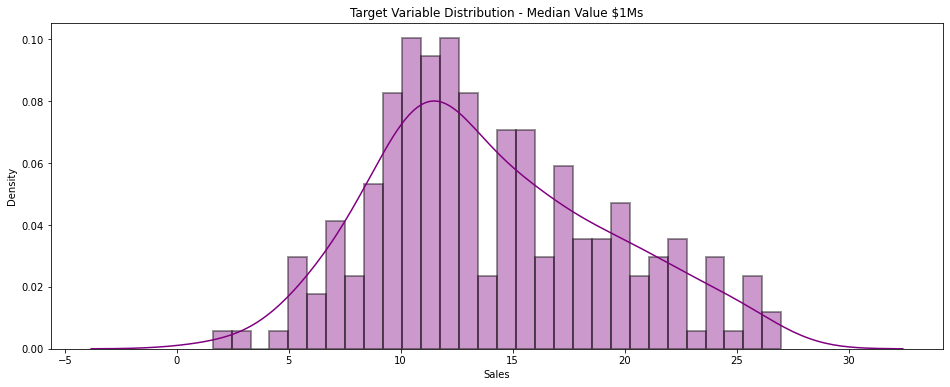

In [6]:
sns.distplot(df[target], color='purple',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value $1Ms')
plt.show()

**<p id='8'><li>Categorical features in the dataset</li></p>**

In [7]:
n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

print("\033[1mInference:\033[0m There are no categorical features in the dataset.")

<Figure size 1080x0 with 0 Axes>

Inference: There are no categorical features in the dataset.


**<p id='9'><li>Numeric Features Distribution</li></p>**

                                                          Numeric Features Distribution                                                           


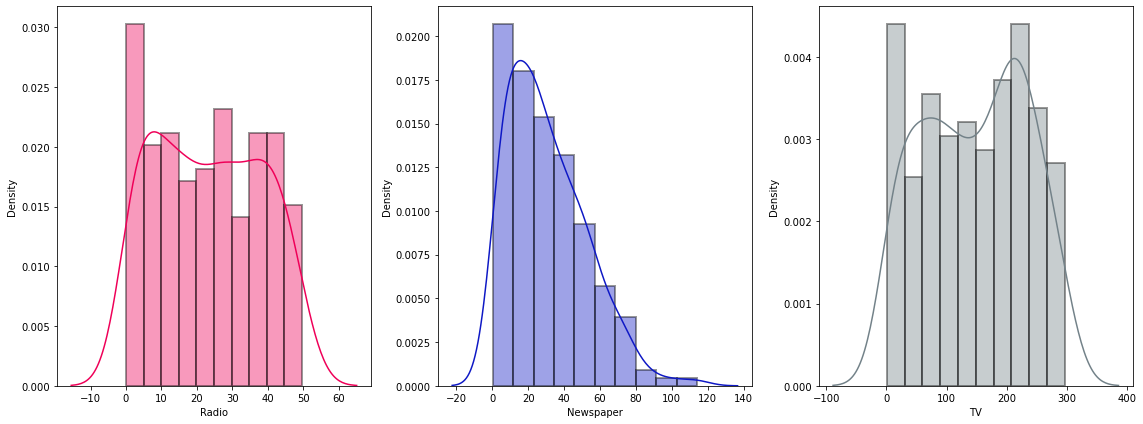

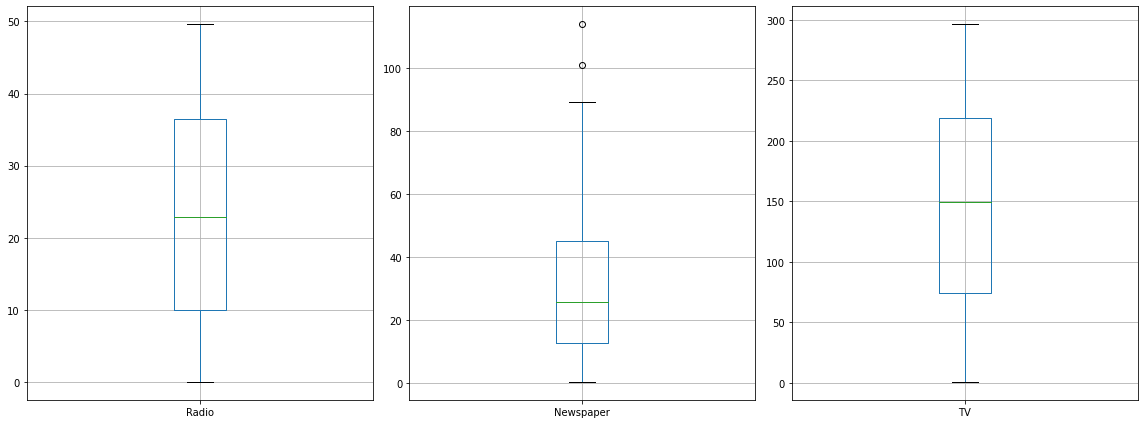

Inference: There seem to be some outliers. let us fix these in the upcoming section...


In [8]:
print('\033[1mNumeric Features Distribution'.center(150))
n=3
plt.figure(figsize=[16,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[16,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

print("\033[1mInference:\033[0m There seem to be some outliers. let us fix these in the upcoming section...")

**<p id='10'><li>Relationship between all the features</li></p>**

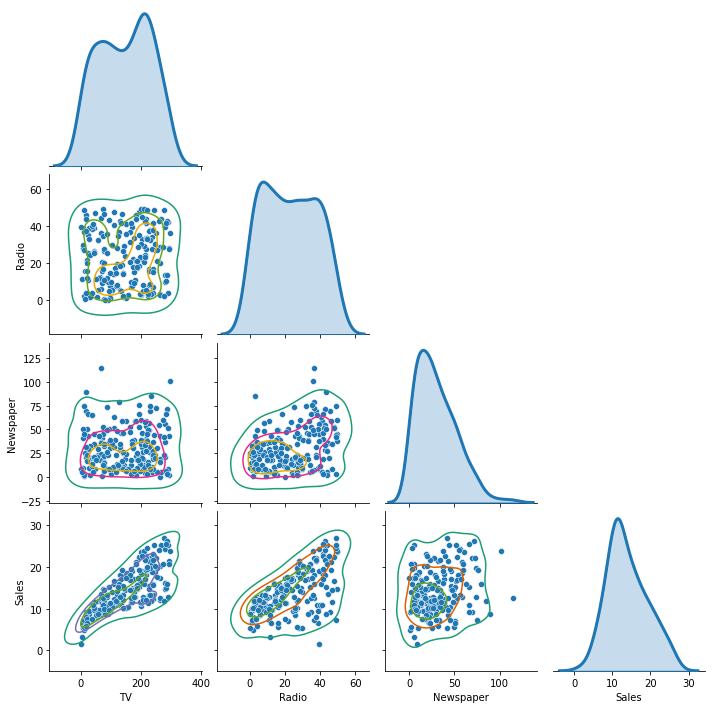

Inference: We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.


In [9]:
#Understanding the relationship between all the features
g = sns.pairplot(df, diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, cmap="Dark2",levels=4)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

print("\033[1mInference:\033[0m We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.")

<a id="11"></a> <br>
# Data Preprocessing

**<p id='12'><li>Remove Duplicates</li></p>**

In [10]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


**<p id='13'><li>Check Inconsistant Values</li></p>**

In [11]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

print("\n\033[1mInference:\033[0m The datset doesn't have any inconsistant values.")

           Total Null Values  Percentage
TV                         0         0.0
Radio                      0         0.0
Newspaper                  0         0.0
Sales                      0         0.0

Inference: The datset doesn't have any inconsistant values.


In [12]:
#Converting categorical Columns to Numeric

df1 = df.copy()
df3 = df1.copy()

**<p id='14'><li>Remove Outliers</li></p>**

In [13]:
#Removal of outlier:

df1 = df3.copy()

features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Inference:
Before removal of outliers, The dataset had 200 samples.
After removal of outliers, The dataset now has 198 samples.


**<p id='15'><li>Dataset after Preprocessing</li></p>**

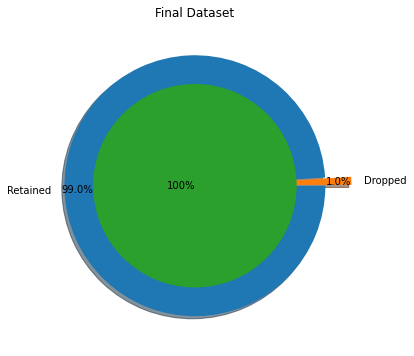


Inference: After the cleanup process, 2 samples were dropped, while retaining 1.0% of the data.


In [14]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,.2], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

<a id="16"></a> <br>
# Data Manipulation

**<p id='17'><li>Spliting Dataset</li></p>**

In [15]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (198, 3) (198,) 
Training set  --->  (158, 3) (158,) 
Testing set   --->  (40, 3)  (40,)


**<p id='18'><li>Standardization</li></p>**

In [16]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,TV,Radio,Newspaper
count,1.580000e+02,1.580000e+02,1.580000e+02
mean,1.208597e-16,-1.447506e-16,-1.826949e-17
std,1.003180e+00,1.003180e+00,1.003180e+00
min,-1.662355e+00,-1.503915e+00,-1.518214e+00
25%,-8.650507e-01,-8.896291e-01,-7.818344e-01
50%,-4.306958e-02,-6.888944e-02,-2.049415e-01
75%,8.793825e-01,8.381548e-01,6.846946e-01
max,1.693726e+00,1.833196e+00,2.892587e+00



                                          Standardardization on Testing set                                          


,TV,Radio,Newspaper
count,40.000000,40.000000,40.000000
mean,-0.120802,0.205424,-0.390968
std,1.014382,1.013117,1.033937
min,-1.739911,-1.524222,-1.548118
25%,-0.998424,-0.739019,-1.168091
50%,0.192538,0.140949,-0.740717
75%,0.690192,1.120760,0.196267
max,1.701951,1.792582,2.384224


<a id="19"></a> <br>
# Feature Selection/Extraction

**<p id='20'><li>Correlation</li></p>**

Correlation Matrix


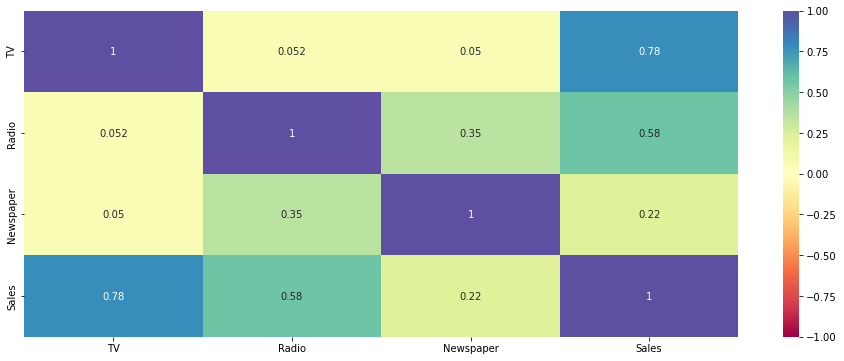


Inference:  There seems to be strong multi-correlation between the features. Let us try to fix these...


In [17]:
#Checking the correlation

print('\033[1mCorrelation Matrix')
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0,cmap='Spectral')
plt.show()

print('\n\033[1mInference:\033[0m  There seems to be strong multi-correlation between the features. Let us try to fix these...') 

**<p id='21'><li>OLS Regression</li></p>**

In [18]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     487.1
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           2.39e-78
Time:                        20:14:54   Log-Likelihood:                -293.76
No. Observations:                 158   AIC:                             595.5
Df Residuals:                     154   BIC:                             607.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0006      0.125    111.865      0.000      13.753      14.248
TV             3.6964      0.125     29.502      0.000       3.449       3.944
Radio          2.9466      0.138     21.365      0.000       2.674       3.219
Newspaper     -0.1928      0.138     -1.400      0.164      -0.465       0.079
==============================================================================
Omnibus:                       17.449   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.654
Skew:                          -0.827   Prob(JB):                     5.40e-05
Kurtosis:                       3.498   Cond. No.                         1.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="22"></a> <br>
# Approach: We can fix these multicollinearity with two techniques

**<p id='22'><li>Manual Method - Variance Inflation Factor (VIF)</li></p>**

Dropped Features -->  ['Radio']


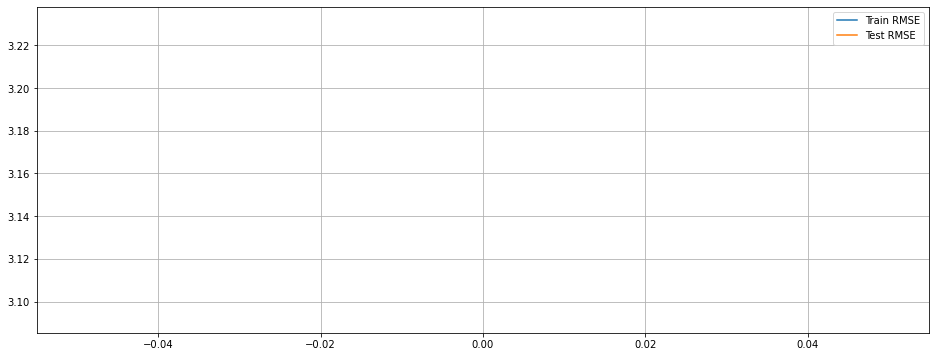

In [19]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        
print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

**<p id='23'><li>Automatic Method - Recursive Feature Elimination (RFE)</li></p>**

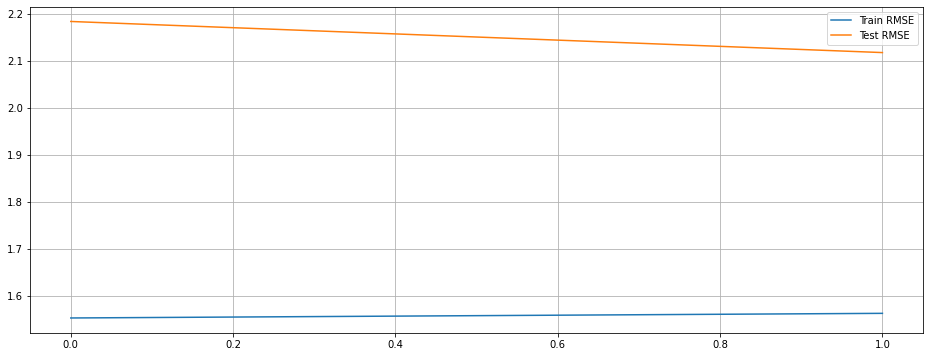

In [20]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    #lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)   # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))



plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

**<p id='24'><li>Feature Elmination using PCA Decomposition)</li></p>**

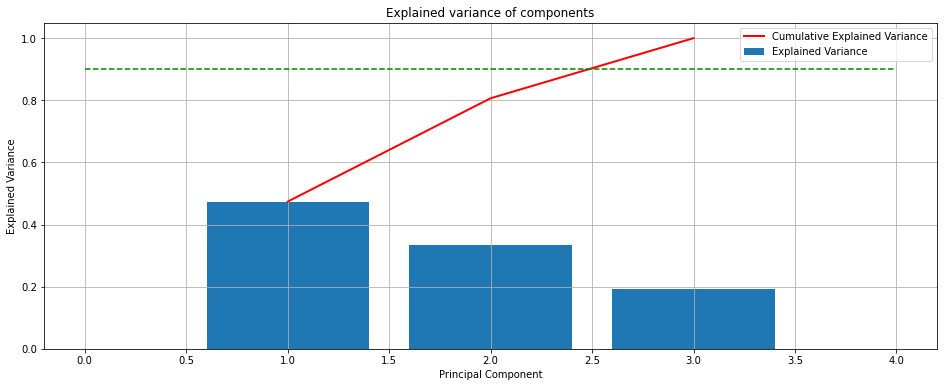

In [21]:
pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(16,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

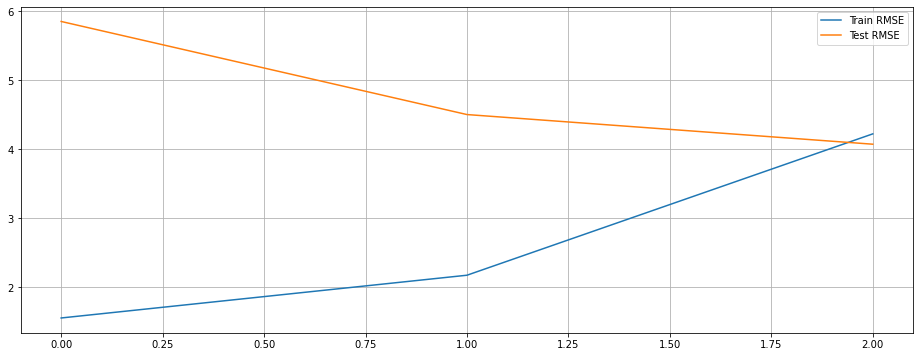


Inference: It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA
Techniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique.


In [22]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()


print('\n\033[1mInference:\033[0m It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA\
\nTechniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique.')

<a id="26"></a> <br>
# Predictive Modelling

**<p id='27'><li>Regression Model Helper Function</li></p>**

In [23]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.columns,2)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()
    

print('\n\033[1mObjective:\033[0m Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model\
both training and testing sets...')


Objective: Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit modelboth training and testing sets...


**<p id='28'><li>Multi Linear Regression (MLR)</li></p>**

<<<-------------------- Evaluating Multiple Linear Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


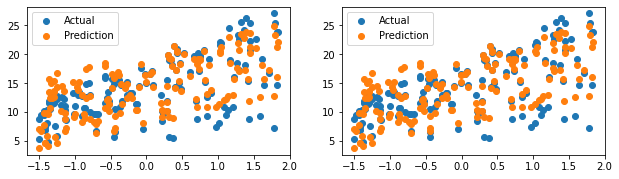



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9046635059559758
Residual Sum of Squares (RSS) on Training set  ---> 381.14099667994697
Mean Squared Error (MSE) on Training set       ---> 2.4122847891135883
Root Mean Squared Error (RMSE) on Training set ---> 1.5531531763202198

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8556177767066228
Residual Sum of Squares (RSS) on Training set  ---> 190.6898976747063
Mean Squared Error (MSE) on Training set       ---> 4.767247441867657
Root Mean Squared Error (RMSE) on Training set ---> 2.183402720953617

--------------------Residual Plots--------------------


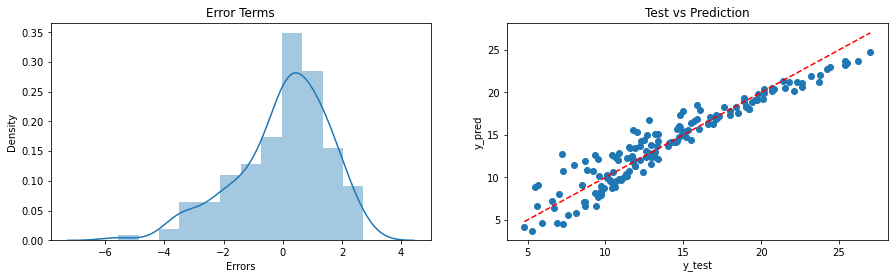

In [24]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

**<p id='28'><li>Ridge Regression Model (RLR)</li></p>**

<<<-------------------- Evaluating Ridge Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


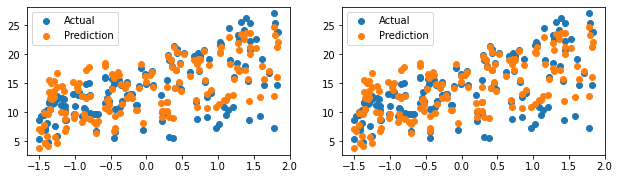



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9046264664952751
Residual Sum of Squares (RSS) on Training set  ---> 381.2890748855642
Mean Squared Error (MSE) on Training set       ---> 2.413221992946609
Root Mean Squared Error (RMSE) on Training set ---> 1.5534548570675006

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8553280806292756
Residual Sum of Squares (RSS) on Training set  ---> 191.07250790251706
Mean Squared Error (MSE) on Training set       ---> 4.776812697562926
Root Mean Squared Error (RMSE) on Training set ---> 2.1855920702553178

--------------------Residual Plots--------------------


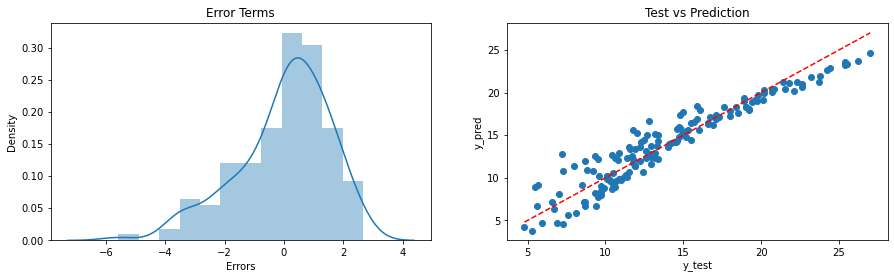

In [25]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

**<p id='29'><li>Lasso Regression Model (LLR)</li></p>**

<<<-------------------- Evaluating Lasso Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


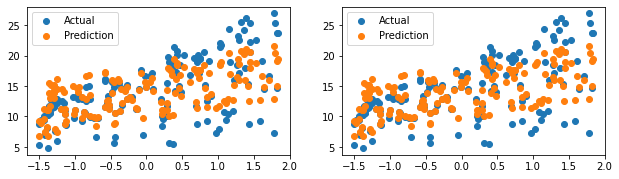



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8278673741198019
Residual Sum of Squares (RSS) on Training set  ---> 688.1604074806794
Mean Squared Error (MSE) on Training set       ---> 4.355445616966326
Root Mean Squared Error (RMSE) on Training set ---> 2.0869704398880033

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.773020361905165
Residual Sum of Squares (RSS) on Training set  ---> 299.7787606760819
Mean Squared Error (MSE) on Training set       ---> 7.4944690169020465
Root Mean Squared Error (RMSE) on Training set ---> 2.737602786545566

--------------------Residual Plots--------------------


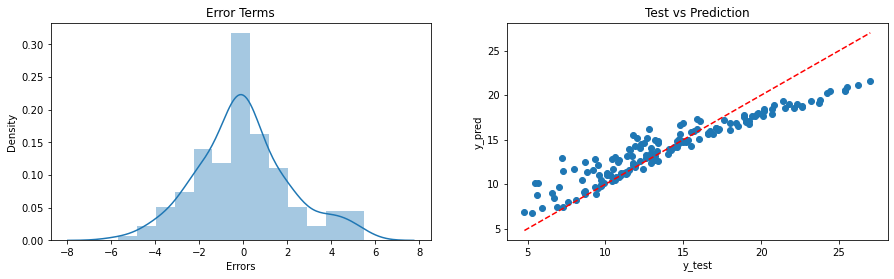

In [26]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

**<p id='30'><li>Elastic-Net Regression (ENR)</li></p>**

<<<-------------------- Evaluating Elastic-Net Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


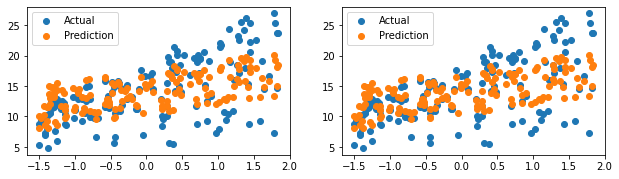



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7433268395138777
Residual Sum of Squares (RSS) on Training set  ---> 1026.1407784043072
Mean Squared Error (MSE) on Training set       ---> 6.4945618886348555
Root Mean Squared Error (RMSE) on Training set ---> 2.548443032252213

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6800469571269883
Residual Sum of Squares (RSS) on Training set  ---> 422.5715023254121
Mean Squared Error (MSE) on Training set       ---> 10.564287558135302
Root Mean Squared Error (RMSE) on Training set ---> 3.250274997309505

--------------------Residual Plots--------------------


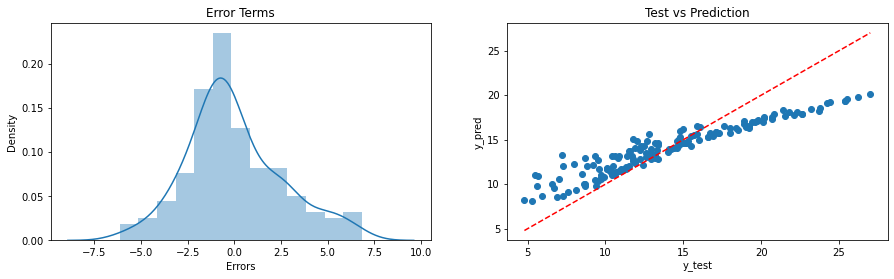

In [27]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

**<p id='31'><li>Polynomial Regression Model (PNR)</li></p>**

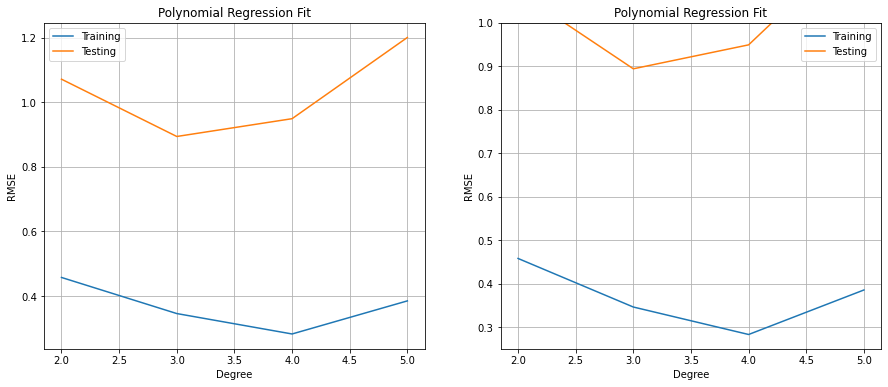


Inference:  We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...


In [28]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0.25,1])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
plt.show()

print('\n\033[1mInference:\033[0m  We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...')

<<<-------------------- Evaluating Polynomial Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


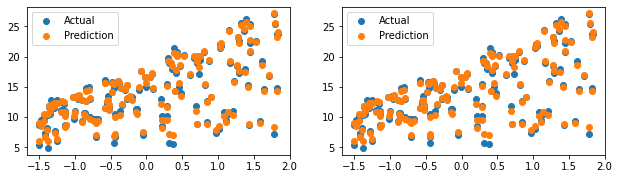



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9917189130237828
Residual Sum of Squares (RSS) on Training set  ---> 33.10654304375106
Mean Squared Error (MSE) on Training set       ---> 0.20953508255538644
Root Mean Squared Error (RMSE) on Training set ---> 0.45775002190648384

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9652533223582987
Residual Sum of Squares (RSS) on Training set  ---> 45.890970875054755
Mean Squared Error (MSE) on Training set       ---> 1.1472742718763689
Root Mean Squared Error (RMSE) on Training set ---> 1.0711088982341472

--------------------Residual Plots--------------------


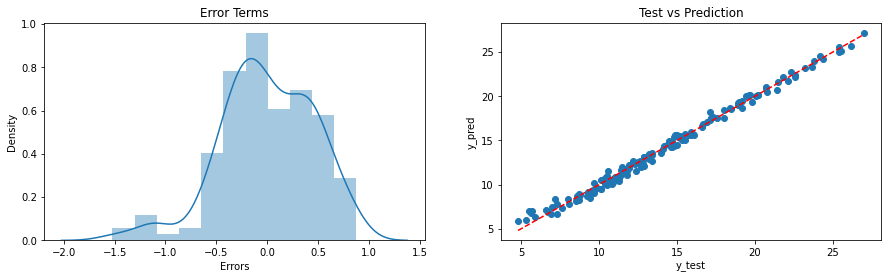

In [29]:
#Using the 2rd Order Polynomial Regression model (degree=3)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

**<p id='32'><li>Evaluation of Metics</li></p>**

In [30]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.904664,0.855618,381.140997,190.689898,2.412285,4.767247,1.553153,2.183403
Ridge Linear Regression (RLR),0.904626,0.855328,381.289075,191.072508,2.413222,4.776813,1.553455,2.185592
Lasso Linear Regression (LLR),0.827867,0.773020,688.160407,299.778761,4.355446,7.494469,2.086970,2.737603
Elastic-Net Regression (ENR),0.743327,0.680047,1026.140778,422.571502,6.494562,10.564288,2.548443,3.250275
Polynomial Regression (PNR),0.991719,0.965253,33.106543,45.890971,0.209535,1.147274,0.457750,1.071109


**<p id='33'><li>Comapring Regression Models</li></p>**

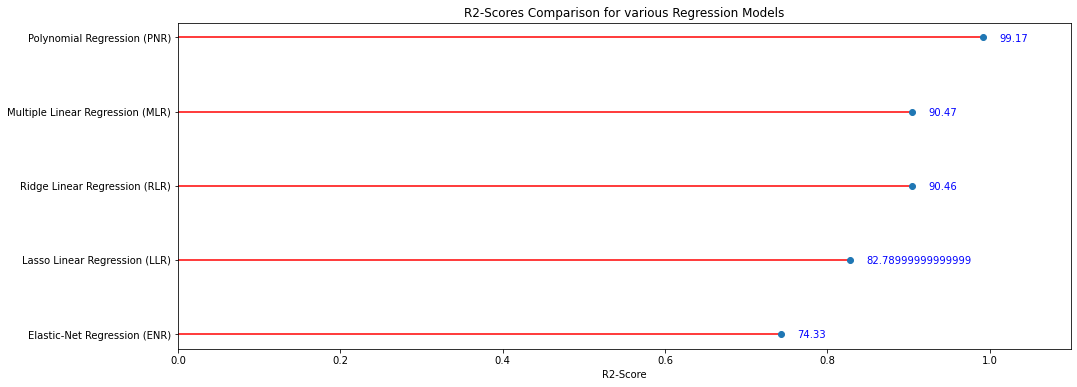

In [31]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values,color='red')
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

 **<p id='34'><li>Root Mean SquaredError Comparison</li></p>**

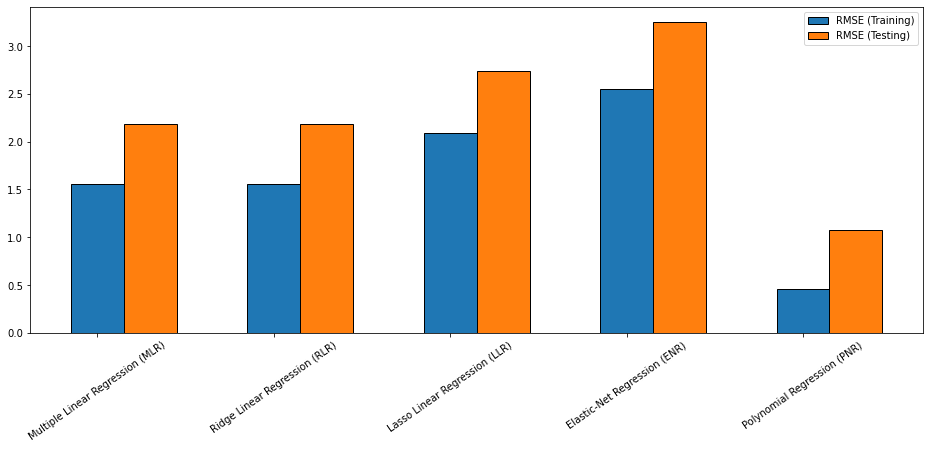


Inference: Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training& testing scores. For this problem,
it is can be said that polynomial regressions are the best choice to go with.


In [32]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)',ec='black')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)',ec='black')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.show()

print('\n\033[1mInference:\033[0m Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training\
& testing scores. For this problem,\nit is can be said that polynomial regressions are the best choice to go with.')

<a id="35"></a> <br>
# Project Outcomes & Conclusions
## Here are some of the key outcomes of the project:
<li>The Dataset was quiet small with just 200 samples & after preprocessing 1% of the datasamples were dropped.</li>
<li>Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.</li>
<li>The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.</li>
<li>Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.</li>
<li>While, Polynomial Regression (Order-2) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable</li>